<a href="https://colab.research.google.com/github/Goitsee07/Analytics_Vault/blob/main/business_funding_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# %% [markdown]
# # Business Funding Analysis
# **By [Your Name]**
# *Postgraduate Diploma in Data Analytics*
#
# ---
#
# This notebook analyzes funding data for South African businesses.
# - **Data Source**: [Kaggle](https://www.kaggle.com/datasets/techsalerator/business-funding-data-in-south-africa)
# - **Tools**: Python, Pandas, Matplotlib

In [2]:
# %%
import pandas as pd

# Load cleaned data directly from your GitHub
url = "https://github.com/Goitsee07/Analytics_Vault/raw/main/projects/business_funding_analysis/data/cleaned/cleaned_business_funding.csv"
df = pd.read_csv(url)

# Show first 3 rows
df.head(3)

,Website Domain,Effective date,Found At,Financing Type,Financing Type Normalized,Categories,Investors,Investors Count,Amount,Amount Normalized,Source Urls,amount_clean
0,trafigura.com,NaN,2024-03-14T01:00:00+01:00,NaN,NaN,NaN,NaN,NaN,$1.9b,1900000000,https://www.tradefinanceglobal.com/posts/trafi...,1.900000e+09
1,zenobe.com,NaN,2024-05-31T02:00:00+02:00,NaN,NaN,NaN,"avivainvestors.com, lloydsbankinggroup.com, sa...",9.0,$522.7 million,522700000,https://realassets.ipe.com/news/aviva-among-le...,5.227000e+08
2,zenobe.com,NaN,2024-07-24T02:00:00+02:00,NaN,NaN,private_equity,NaN,NaN,£41.7m,53671000,https://www.innovationnewsnetwork.com/zenobe-a...,4.170000e+07


In [4]:
# %% [markdown]
# ## Data Cleaning

# %%
from ast import literal_eval

# Safely convert Categories
def safe_convert(cat_str):
    try:
        return literal_eval(str(cat_str))
    except:
        return [str(cat_str)]  # Fallback for invalid formats

df['Categories'] = df['Categories'].apply(safe_convert)

# Handle dates
df['Effective date'] = pd.to_datetime(df['Effective date'], errors='coerce')  # Convert invalid dates to NaT

print("✅ Cleaning completed!")
print("Missing dates:", df['Effective date'].isna().sum())

✅ Cleaning completed!
Missing dates: 27


In [5]:
# %% [markdown]
# ## Key Metrics

# %%
# Verify required columns exist
required_cols = ['amount_clean', 'Categories']
missing = [col for col in required_cols if col not in df.columns]

if missing:
    print(f"❌ Missing columns: {missing}")
else:
    total_funding = df['amount_clean'].sum()
    avg_funding = df['amount_clean'].mean()
    top_sector = df['Categories'].explode().value_counts().idxmax()

    print(f"📊 Total Funding: R{total_funding/1e9:.2f}B")
    print(f"📊 Average Deal Size: R{avg_funding/1e6:.2f}M")
    print(f"🏆 Top Sector: {top_sector}")

📊 Total Funding: R6.63B
📊 Average Deal Size: R189.31M
🏆 Top Sector: nan


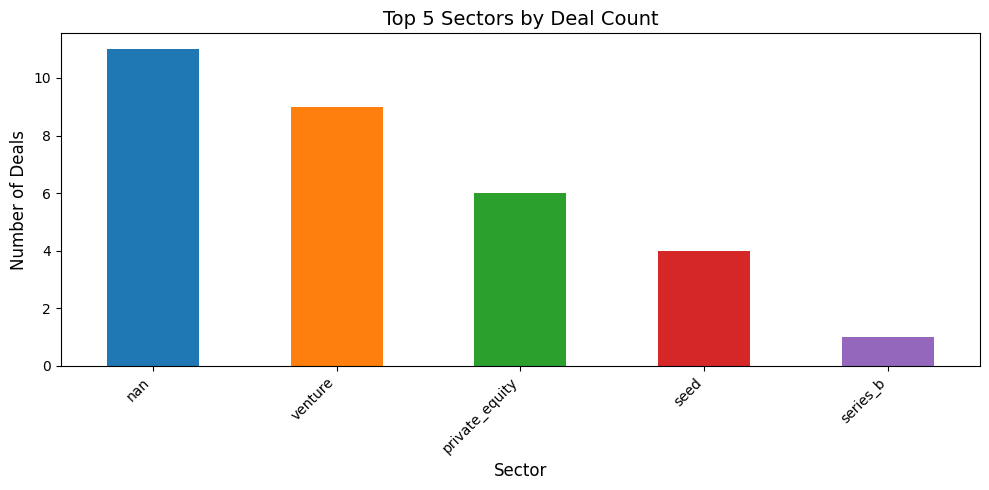

In [6]:
# %% [markdown]
# ## Visualizations

# %%
# Install dependencies if missing
try:
    import matplotlib.pyplot as plt
except ImportError:
    !pip install matplotlib
    import matplotlib.pyplot as plt

# Ensure Categories are exploded
df_exploded = df.explode('Categories')

# Plot top sectors
plt.figure(figsize=(10,5))
df_exploded['Categories'].value_counts().head(5).plot(
    kind='bar',
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
)
plt.title("Top 5 Sectors by Deal Count", fontsize=14)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Number of Deals", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()